<a href="https://colab.research.google.com/github/pseeej/MachineLearning_DCLAB/blob/master/AI%20for%20Everyone/16.%20number_recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential  # 순차적인 신경망 구성 위함
from tensorflow.keras.layers import Dense, Activation # 각 Layer의 뉴런 개수 설정, 활성화 함수 사용 위함
from tensorflow.keras.utils import to_categorical # 이미지를 학습시키기 위한 방법으로 one-hot incoding 사용. 이거 구현 위한 함수
from tensorflow.keras.datasets import mnist # mnist dataset 불러오기
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # mnist에서 data 불러오기

# train은 훈련 data, test는 검증 data. x는 각 손글씨 그림, y는 그 그림이 어떤 숫자를 의미하는지(정답)
print("x_train shape", x_train.shape) # 총 60000개 data, 각각 가로 28 세로 28개의 data 있음. 그림 190
print("y_train shape", y_train.shape) # x_train data의 정답. index별로 그에 대한 정답값 갖고 있음.

print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [3]:
# 28x28 data를 인공신경망의 입력층에 넣기 위해 1차원 배열로 변경.
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)

# 정규화하기 위해 데이터를 0~1 사이의 값으로 바꿔줌.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255  # 색이 0부터 255 사이의 값으로 나타나있음.
X_test /= 255

print("X Training matrix shape", X_train.shape)
print("X Testing matrix shape", X_test.shape)

X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [5]:
# 수치형 데이터를 범주형 데이터로 변환. 이미지의 레이블(정답)을 index로 구분하여 표현함. 이렇게 하면 더 높은 성능.
# 예측이 아닌 분류 문제에서는 대부분 정답 레이블을 순서로 나타내도록 데이터 형태 바꿈.
# 이때 사용하는 것이 <one hot coding>

# to_categorical(변경 전 데이터, 원-핫 인코딩할 숫자(몇 개로 구분할 건지))
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


In [6]:
# 인공지능 모델 설계하기
# 입력층-은닉층 2개-결과 출력되는 출력층

# 입력층 뉴런 수 78개(28*28)
# 첫 번째 은닉층의 노드 512개로 지정
# 첫 번째 은닉층 - 두 번째 은닉층 ReLU함수 사용.
# 두 번째 은닉층의 노드는 256개. 그 다음으로 갈 때도 ReLU함수.
# 마지막 노드는 10개. 총 10개로 분류할 것이기 때문.
# 가장 높은 확률의 값으로 분류하기 위해 각 노드 최종 값을 softmax함수를 사용하여 나타냄.

model = Sequential()
model.add(Dense(512, input_shape=(784,))) # model에 층 추가. Dense(해당 은닉층의 노드 수, 입력하는 데이터의 형태)
model.add(Activation('relu')) # 다음 층으로 값을 전달할 때 어떤 활성화 함수 사용하여 전달할 것인지.
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))  # 각 노드에서 전달되는 값의 총합이 1이 되도록 하기 위해 softmax함수 사용.
model.summary() # 모델 어떻게 구성되어있는지 확인 가능.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
__________________________________________________

In [7]:
# 401920 = (784*512+512). 784개 입력층에서 512개 은닉층으로 각각 연결되어 있어 784*512만큼의 가중치. 그리고 각 노드 수만큼의 편향인 512.
# 131328 = (512*256+256). 256개의 노드로 구성됨. 512개의 입력층.
# 2570 = (256*10+10) 256개의 입력층, 10개의 출력층.

In [9]:
# compile(오차값 계산 방법, 오차 줄이는 방법, 학습 결과 어떻게 확인할지.)
# categorical_crossentropy = 다중 분류 문제 해결 위함
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit(입력할 데이터, 인공지능 모델이 한 번에 학습하는 데이터의 수, 몇 번 반복해서 학습시킬 것인지, fit함수 결과값 출력 방법.)
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.4193 - accuracy: 0.8772
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0894 - accuracy: 0.9722
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0521 - accuracy: 0.9837
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0344 - accuracy: 0.9893
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0261 - accuracy: 0.9923
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0197 - accuracy: 0.9937
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0173 - accuracy: 0.9941
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0120 - accuracy: 0.9960
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0143 - accuracy: 0.9953
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0123 - accura

In [10]:
# model의 정확도 평가 위한 evaluate 함수. evaluate(test할 데이터, test할 data의 정답)
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])  # 오차값
print('Test accuracy', score[1])  # 정확도

313/313 [==============================] - 1s 3ms/step - loss: 0.0768 - accuracy: 0.9807
Test score: 0.07678993791341782
Test accuracy 0.9807000160217285


In [12]:
# 각 입력 data를 보고 AI가 어떤 수로 예상하는지 알려줌. softmax함수 이용. argmax로 가장 큰 값 찾아냄.
# axis => 기준을 정해줌. 0일 때 각 열에서 가장 큰 수 고르고, 1일 때 각 행에서 가장 큰 수 고름.
predicted_classes = np.argmax(model.predict(X_test), axis=1)  

# 실제 값과 예측 값이 일치하는 값을 찾아내어 correct_indices 변수에 저장.
# nonzero함수를 이용하여 배열에서 0이 아닌 값을 찾아냄. 이 함수 사용하여 정확하게 예측한 데이터 위치 알아냄.
correct_indices = np.nonzero(predicted_classes == y_test)[0]


# 실제 값과 예측 값 불일치.
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

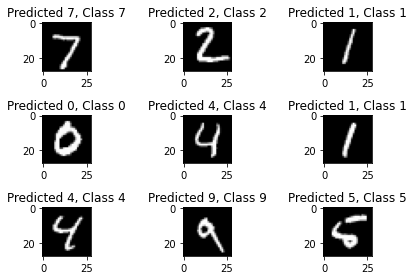

In [13]:
# 잘 예측한 데이터 살펴보기

plt.figure()
for i in range(9):
  plt.subplot(3, 3, i+1)
  correct = correct_indices[i]  # 정답만 모아둔 배열에서 값 하나씩 꺼내서 저장
  plt.imshow(X_test[correct].reshape(28, 28), cmap='gray')  # 한 줄로 늘어져있던 데이터 다시 28*28 배열로 reshape. 회색조로 나타냄
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct])) # 예측값, 실제 값
plt.tight_layout()

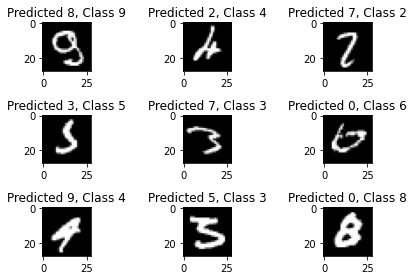

In [14]:
# 잘 예측하지 못한 데이터 살펴보기

plt.figure()
for i in range(9):
  plt.subplot(3, 3, i+1)
  incorrect = incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray')
  plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.tight_layout()